This notebook demonstrates the nice features offered in seaborn, python visualization library, and why visualization is an important step in data interpretation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv('/Users/Sri/Desktop/Kaggle/Titanic/train.csv', index_col=None)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Data has some missing values. Lets clean the data and add meaningful values to the categorical variables so that they can be better understood through plots.

In [23]:
# add class ranges to PClass variable
data['class'] = data.Pclass.map({1:'First',2:'Second',3:'Third'})
# some values have T as deck make it NaN 
data['deck'] = data.Cabin.str[0].map(lambda s:np.nan if s=='T' else s)
# add town name
data['embark_town'] = data.Embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
# add yes or no from the survival column
data['alive'] = data.Survived.map({1:'Yes',2:'No'})
# add alone True/False -- if no family members present then its True else False
data['alone'] = ~(data.Parch+data.SibSp).astype(bool)

In [24]:
# Drop columns name, ticket, cabin as we are not going to use them
data.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [35]:
# returns Child if the age is below 16 else returns Man for Male and Woman for Female
def convert_to_value(x):
    age,sex = x
    if age<16:
        return 'Child'
    else:
        dict = {'male':'Man', 'female':'Woman'}
        return dict[sex]

In [34]:
data['who'] = data[['Age','Sex']].apply(convert_to_value,axis=1)
data['adult_male'] = (data.who=='Man')

In [36]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,class,deck,embark_town,alive,alone,who,adult_male
0,1,0,3,male,22,1,0,7.2500,S,Third,NaN,Southampton,NaN,False,Man,True
1,2,1,1,female,38,1,0,71.2833,C,First,C,Cherbourg,Yes,False,Woman,False
2,3,1,3,female,26,0,0,7.9250,S,Third,NaN,Southampton,Yes,True,Woman,False
3,4,1,1,female,35,1,0,53.1000,S,First,C,Southampton,Yes,False,Woman,False
4,5,0,3,male,35,0,0,8.0500,S,Third,NaN,Southampton,NaN,True,Man,True


Now that we have cleaned the data and added some interesting features lets get into the details. Ask Qs and answer with the plots

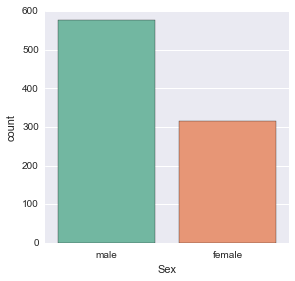

In [53]:
# Who are the passengers
sns.factorplot('Sex', data=data, kind='count', palette='Set2')

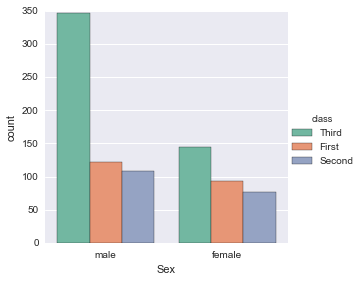

In [60]:
# what are the respective values for different classes
g = sns.factorplot('Sex', hue='class',data=data, kind='count', palette='Set2')

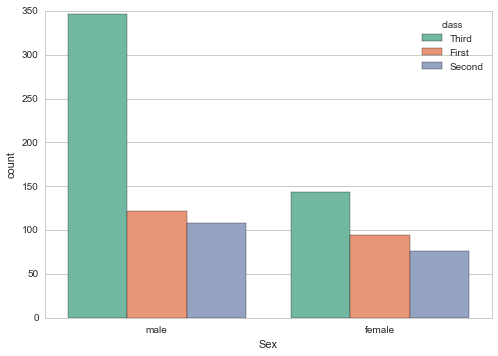

In [64]:
g = sns.countplot('Sex', hue='class',data=data, palette='Set2')

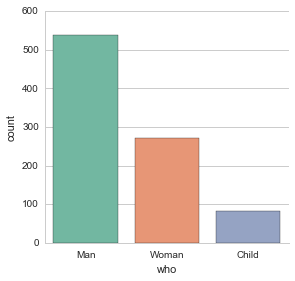

In [66]:
g = sns.factorplot('who',data=data, kind='count', palette='Set2')
# we can also use count plot for the same graph
# sns.countplot('who',data=data, palette='Set2')

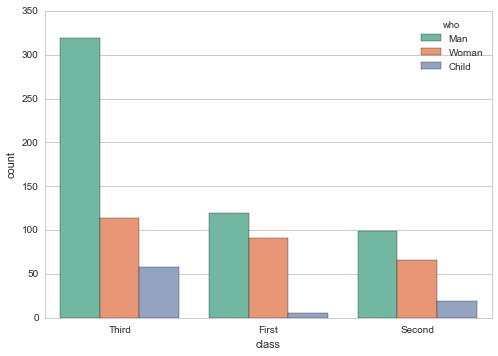

In [70]:
g = sns.countplot('class', hue='who', data=data,palette='Set2')

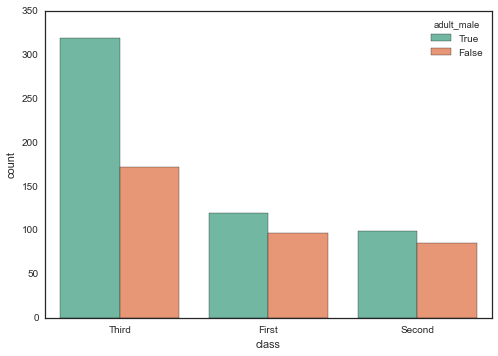

In [99]:
g = sns.countplot('class', hue='adult_male', data=data, palette='Set2')

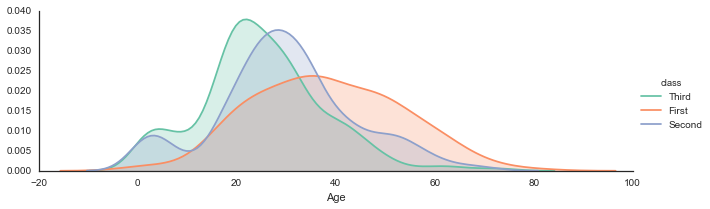

In [89]:
g = sns.FacetGrid(data, hue='class',aspect=3,palette='Set2',)
g = g.map(sns.kdeplot, 'Age', shade=True)
g = g.add_legend()

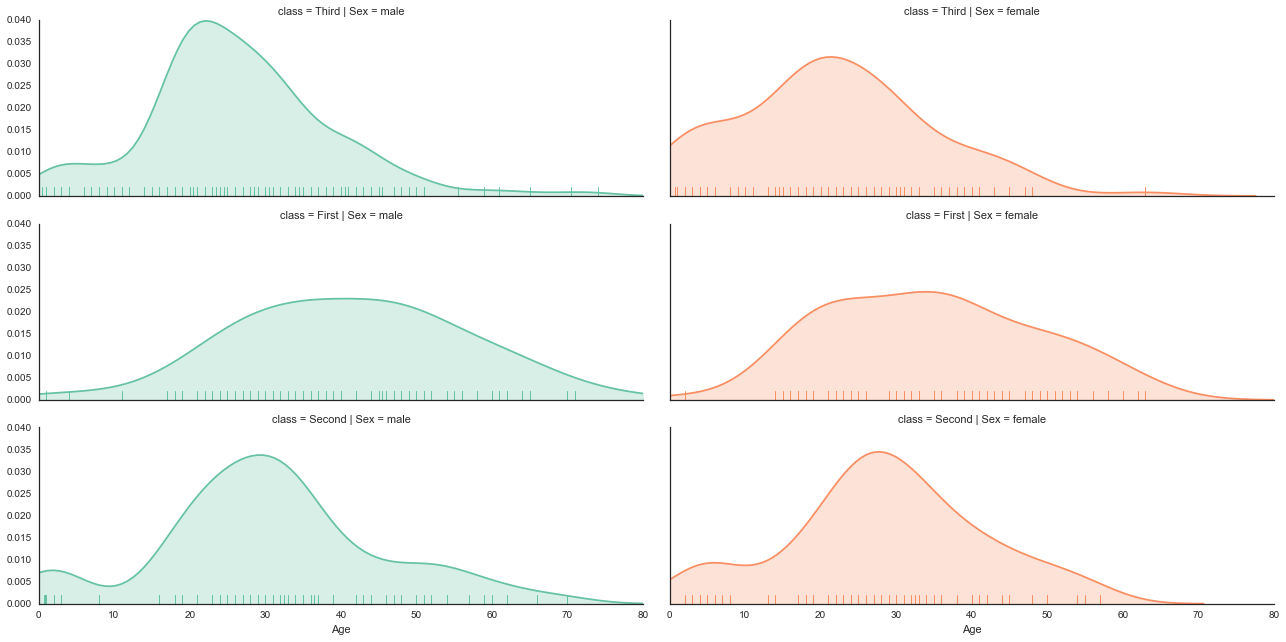

In [105]:
# breakdown of Age and Sex
g = sns.FacetGrid(data, col='Sex', row='class', hue='Sex', aspect=3, size=3, palette='Set2')
g = g.map(sns.kdeplot,'Age', shade=True)
g = g.map(sns.rugplot,'Age')
g = g.set(xlim=(0,80))

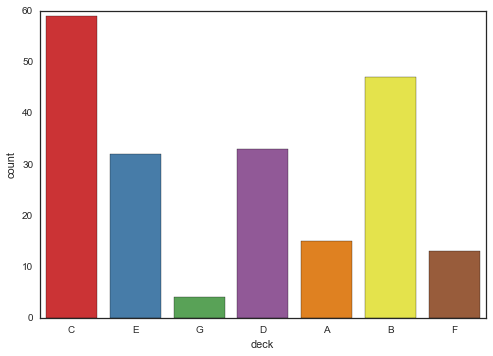

In [107]:
# plot deck
g = sns.countplot('deck',data=data, palette='Set1')

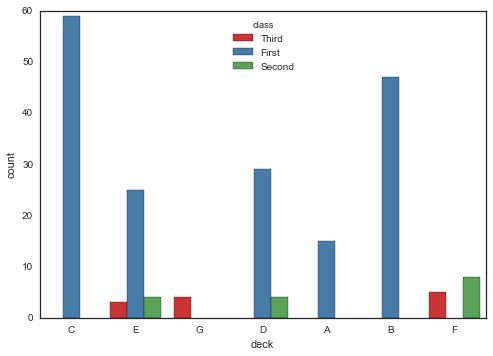

In [108]:
# breakdown Deck
g = sns.countplot('deck',data=data, palette='Set1', hue='class')